In [35]:
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.linear_model import LinearRegression
%matplotlib inline

# Regression Analysis: Seasonal Effects with Sklearn Linear Regression
In this notebook, you will build a SKLearn linear regression model to predict Yen futures ("settle") returns with *lagged* Yen futures returns. 

In [36]:
# Futures contract on the Yen-dollar exchange rate:
# This is the continuous chain of the futures contracts that are 1 month to expiration
yen_futures = pd.read_csv(
    Path("yen.csv"), index_col="Date", infer_datetime_format=True, parse_dates=True
)
yen_futures.head()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
Date,,,,,,,,
1976-08-02,3398.0,3401.0,3398.0,3401.0,NaN,3401.0,2.0,1.0
1976-08-03,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0.0,1.0
1976-08-04,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0.0,1.0
1976-08-05,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0.0,1.0
1976-08-06,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0.0,1.0


In [37]:
# Trim the dataset to begin on January 1st, 1990
yen_futures = yen_futures.loc["1990-01-01":, :]
yen_futures.head()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
Date,,,,,,,,
1990-01-02,6954.0,6954.0,6835.0,6847.0,NaN,6847.0,48336.0,51473.0
1990-01-03,6877.0,6910.0,6865.0,6887.0,NaN,6887.0,38206.0,53860.0
1990-01-04,6937.0,7030.0,6924.0,7008.0,NaN,7008.0,49649.0,55699.0
1990-01-05,6952.0,6985.0,6942.0,6950.0,NaN,6950.0,29944.0,53111.0
1990-01-08,6936.0,6972.0,6936.0,6959.0,NaN,6959.0,19763.0,52072.0


# Data Preparation

### Returns

In [81]:
# Create a series using "Settle" price percentage returns, drop any nan"s, and check the results:
# (Make sure to multiply the pct_change() results by 100)
# In this case, you may have to replace inf, -inf values with np.nan"s

yen_futures['Return'] = yen_futures.Settle.pct_change()*100


### Lagged Returns 

In [82]:
# Create a lagged return using the shift function


yen_futures['Lagged_Return'] = yen_futures.Return.shift()


In [89]:
df = yen_futures.dropna()

### Train Test Split

In [18]:
# Create a train/test split for the data using 2018-2019 for testing and the rest for training


In [93]:
train = df[:'2017']

In [94]:
test = df['2018':]

In [95]:
# Create four dataframes:
# X_train (training set using just the independent variables), X_test (test set of of just the independent variables)
# Y_train (training set using just the "y" variable, i.e., "Futures Return"), Y_test (test set of just the "y" variable):


X_train = train["Lagged_Return"].to_frame()
X_test = test["Lagged_Return"].to_frame()
y_train = train["Return"]
y_test = test["Return"]

# Linear Regression Model

In [75]:
# Create a Linear Regression model and fit it to the training data
from sklearn.linear_model import LinearRegression



In [96]:
# Fit a SKLearn linear regression using just the training set (X_train, Y_train):

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Make predictions using the Testing Data

Note: We want to evaluate the model using data that it has never seen before, in this case: X_test.

In [97]:
# Make a prediction of "y" values using just the test dataset
predictions = model.predict(X_test)

In [98]:
# Assemble actual y data (Y_test) with predicted y data (from just above) into two columns in a dataframe:
Results = y_test.to_frame()
Results["Predicted Return"] = predictions

In [99]:
Results.head(2)

,Return,Predicted Return
Date,,
2018-01-02,0.297285,-0.009599
2018-01-03,-0.240479,-0.010033


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

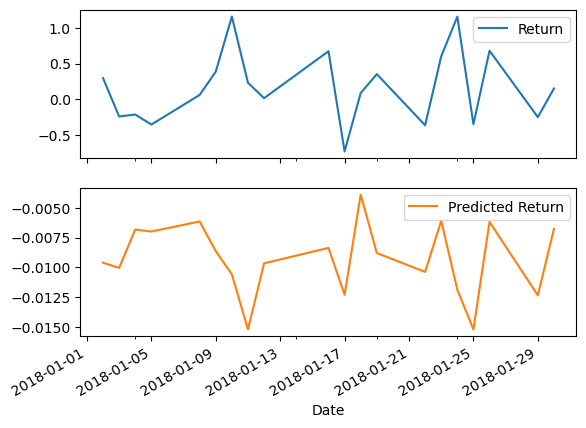

In [108]:
# Plot the first 20 predictions vs the true values


<AxesSubplot:xlabel='Date'>

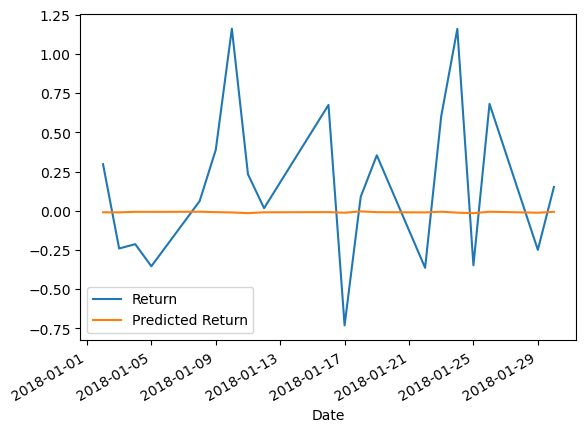

In [109]:
Results[:20].plot()

# Out-of-Sample Performance

Evaluate the model using "out-of-sample" data (X_test and y_test)

In [101]:
from sklearn.metrics import mean_squared_error
# Calculate the mean_squared_error (MSE) on actual versus predicted test "y" 
mse = mean_squared_error(
    Results["Return"],
    Results["Predicted Return"]
)




In [102]:
# Using that mean-squared-error, calculate the root-mean-squared error (RMSE):

rmse = np.sqrt(mse)
print(f"Out-of-Sample Root Mean Squared Error (RMSE): {rmse}")

Out-of-Sample Root Mean Squared Error (RMSE): 0.41545437184712763


# In-Sample Performance

Evaluate the model using in-sample data (X_train and y_train)

In [103]:
# Construct a dataframe using just the "y" training data:
in_sample_results = y_train.to_frame()


In [104]:
# Add a column of "in-sample" predictions to that dataframe:  
in_sample_results["In-sample Predictions"] = model.predict(X_train)

In [105]:
# Calculate in-sample mean_squared_error (for comparison to out-of-sample)

in_sample_mse = mean_squared_error(
    in_sample_results["Return"],
    in_sample_results["In-sample Predictions"]
)


In [106]:
# Calculate in-sample root mean_squared_error (for comparison to out-of-sample)

in_sample_rmse = np.sqrt(in_sample_mse)
print(f"In-sample Root Mean Squared Error (RMSE): {in_sample_rmse}")

In-sample Root Mean Squared Error (RMSE): 0.5962037920929946


# Conclusions

YOUR CONCLUSIONS HERE!

In [115]:
#check for benchcmark using a simpler model such as mean square error

(np.mean((Results['Return'] - Results['Return'].mean())**2))**0.5

0.41524760389060195

In [ ]:
RMSE for both sample shows the returns data does not have high variance.
We have a slightly higher insample error prediction (0.59%) compared to out-of-sample error prediction (0.41%). 
Given the out of sample error is very similar to the mean square error, we can argue our model is not that great.